In [1]:
import pandas as pd
import sqlalchemy as sql
import database as db
import betSim as bs
import mysql.connector as mysql

In [2]:
df = db.getTable('LCK_Summer_2022')

In [3]:
# very basic simulation of a beting strategy
units =100.0
for i in range(len(df)):
    if (units < 1):
        print(f'no more units left after {str(i)} games')
        break
    outcome = bs.killsBet(i, df, 'under', 21.5)
    if(outcome == 1):
        units += 0.83
    else:
        units -= 1

print(f'units: {str(units)}')

units: 87.23999999999995


In [1]:
import matplotlib.pyplot as plt


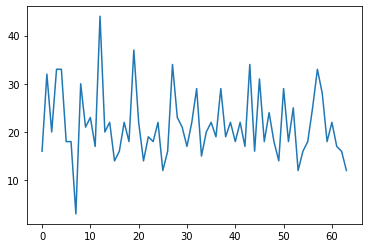

In [5]:
#plot total kills over the tournament
plt.plot(df['Total_kills'])

In [14]:
df_firstGame = pd.read_sql_query('SELECT * From games where tournamentID = 5 and Num_in_Match = 1', db.engine)

In [15]:
#plt.plot(df_firstGame['Total_kills'])
print(len(df_firstGame))

90


In [2]:
def runSim(df,choice,num,betType):
    units = 100.0
    wins = 0
    loses = 0
    for i in range(df):
        if (units < 1):
            print(f'no more units left after {str(i)} games')
            return units , wins, loses
        if(betType == 'kills'):
            outcome = bs.killsBet(i, df, choice, num)
        elif(betType == 'dragons'):
            outcome = bs.dragonsBet(i, df, choice, num)
        elif(betType == 'barons'):
            outcome = bs.baronsBet(i, df, choice, num)
        elif(betType == 'tower'):
            outcome = bs.towerBet(i, df, choice, num)
        elif(betType == 'time'):
            outcome = bs.gameTimeBet(i, df, choice, num)
        else:
            print('invalid bet type')
            return 0 , wins, loses
        if(outcome == 1):
            units += 0.83
        else:
            units -= 1
    return units , wins, loses

IndentationError: expected an indented block after 'if' statement on line 7 (3638535561.py, line 8)

In [19]:
# very basic simulation of a beting strategy
units =100.0
wins = 0
loses = 0
for i in range(len(df_firstGame)):
    if (units < 1):
        print(f'no more units left after {str(i)} games')
        break
    try:
        outcome = bs.killsBet(i, df, 'under', 21.5)
    except Exception:
        print(f'code died at {i}')
        break
    wins += outcome
    loses += 1 - outcome
    if(outcome == 1):
        units += 0.83
    else:
        units -= 1

print(f'units: {str(units)}')
totalbets = wins + loses
print(f'wins: {str(wins)}')
print(f'loses: {str(loses)}')
print(f'total bets: {str(totalbets)}')
winrate = round(wins/totalbets,2)
print(f'winrate: {str(winrate)}')

code died at 64
units: 87.23999999999995
wins: 28
loses: 36
total bets: 64
winrate: 0.44
